### 1. Import des librairies 

In [1]:
import requests
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
from shapely.geometry import mapping, Polygon
from shapely.wkt import loads as wkt_loads
from shapely.geometry import box
import matplotlib.pyplot as plt

### 2. Liste des paramètres

In [2]:
# Listes des paramètres
url_service='https://api.geosas.fr/edr/collections/safran-isba/'
r=requests.get(url_service)
data_info=r.json()
if r.status_code == 200:
    print("Listes des paramètres: ")
else :
    print("Erreur code : vérifier url", r.status_code)
print(f"")
for parametre in data_info['parameter_names']:
    name = list(parametre.keys())[0]
    description = parametre[name]['description']
    unit_info = parametre[name]['unit']
    unit_label = unit_info['label']
    unit_symbol = unit_info['symbol']['value']  
    print(f"{name}: {description}|{unit_label} ({unit_symbol})")
    print(f"")

Listes des paramètres: 

DLI_Q: Rayonnement atmosphérique (cumul quotidien)|Joule par centimètre² (J/cm²)

DRAINC_Q: Drainage (cumul quotidien 06-06 UTC)|millimetre (mm)

ETP_Q: Evapotranspiration potentielle (formule de Penman-Monteith)|millimetre (mm)

FF_Q: Vent (moyenne quotidienne)|mètre par seconde (m/s)

PRELIQ_Q: Précipitations liquides (cumul quotidien 06-06 UTC)|millimetre (mm)

PRENEI_Q: Précipitations solide (cumul quotidien 06-06 UTC)|millimetre (mm)

SSI_Q: Rayonnement visible (cumul quotidien)|Joule par centimètre² (J/cm²)

SWI_Q: Indice d'humidité des sols (moyenne quotidienne 06-06 UTC)|Pourcentage (%)

TINF_H_Q: Température minimale des 24 températures horaires|degrée Celcius (°C)

TSUP_H_Q: Température maximale des 24 températures horaires|degrée Celcius (°C)

T_Q: Température (moyenne quotidienne)|degrée Celcius (°C)



### 3. Générer une API selon une emprise rectangulaire

In [24]:
param_name='PRELIQ_Q' #choix du paramètre selon la liste ci-dessus
box='584723.146,6372058.711,657446.664,6424187.958' # x coin inf gauche, y= coin inf gauche, x = coin sup droit y= coin sup droit
projection='EPSG:2154' #Lambert 93 
formatage='netCDF4'
date='2020-01-01/2024-03-06'
requete=f'https://api.geosas.fr/edr/collections/safran-isba/cube?bbox={box}&crs={projection}&parameter-name={param_name}&f={formatage}&datetime={date}'
print(requete)
r=requests.get(requete)
if r.status_code == 200:
    print("requete ok")
else :
    print("erreur code :", r.status_code)

https://api.geosas.fr/edr/collections/safran-isba/cube?bbox=584723.146,6372058.711,657446.664,6424187.958&crs=EPSG:2154&parameter-name=PRELIQ_Q&f=netCDF4&datetime=2020-01-01/2024-03-06
requete ok


### 4. Exporter les résultats dans un tableau 

In [9]:
data=xr.open_dataset(r.content,engine='scipy')
data

<xarray.Dataset> Size: 342kB
Dimensions:      (time: 1527, y: 6, x: 9)
Coordinates:
  * time         (time) datetime64[ns] 12kB 2020-01-01 2020-01-02 ... 2024-03-06
  * x            (x) float64 72B 5.873e+05 5.953e+05 ... 6.432e+05 6.512e+05
  * y            (y) float64 48B 6.419e+06 6.411e+06 ... 6.387e+06 6.379e+06
Data variables:
    PRELIQ_Q     (time, y, x) float32 330kB ...
    spatial_ref  int32 4B ...
Attributes:
    description:  Données quotidiennes du modèle de simulation des schémas de...
    id:           safran-isba
    title:        Safran-Isba, Données changement climatique - SIM quotidienne
    crs:          EPSG:2154
    rel:          https://www.etalab.gouv.fr/licence-ouverte-open-licence/

### 5. Représentation spatiale des résultats
####  5.1 importer le bassin versant

In [10]:
# Importer le BV depuis Qgis: Dans la calculatrice de champs générer un un wkt avec la commande :"geom_to_wkt( $geometry )" 
BV_CELE  = "MultiPolygon (((638914.0798334 6418095.49909256, 638935.80443702 6417997.22489306, 639017.10049693 6417741.41245422, 639103.35915777 6417627.03079805, 639304.29337632 6417511.23004758, 639520.6096396 6417509.98907621, 639874.52611948 6417511.25731171, 640146.82581714 6417470.63058704, 640330.05326057 6417427.20226032, 640477.56335058 6417342.06656831, 640566.51929356 6417194.46882671, 640602.2834573 6417105.2337006, 640627.28681605 6417043.10131224, 640773.53441609 6416889.30027442, 640915.99531647 6416843.58104628, 641144.9001361 6416787.52243372, 641426.24120659 6416746.81959949, 641633.4954033 6416702.27394134, 641760.79050926 6416636.07899637, 641788.93597239 6416621.07769172, 641951.54083317 6416534.3272797, 642369.10151873 6416563.56163128, 642948.66282053 6416843.47810082, 642949.69863302 6416844.15617458, 643762.93155335 6417404.37128983, 643980.79310905 6417532.79979805, 644202.51966239 6417685.34694867, 644436.8905484 6417844.31228404, 644571.96079713 6417940.92843191, 644675.08754429 6417995.46224862, 644827.99336128 6418075.90521621, 644872.65712438 6418092.47102425, 645002.39219195 6418044.11184295, 645028.24333759 6418014.82235654, 645098.99302393 6417934.56527654, 645273.0225335 6417776.86892755, 645401.52223432 6417690.4048804, 645611.31099833 6417565.71669758, 645836.493465 6417406.7903998, 646030.98323284 6417273.07358813, 646301.83554187 6417114.2223253, 646548.40002797 6416952.71308516, 646713.77493925 6416868.57247031, 646824.21617655 6416771.6149104, 646831.63074443 6416754.95607219, 646852.52943525 6416667.44796924, 646836.75295377 6416560.56015564, 646806.04650161 6416406.75445689, 646792.58922178 6416344.3721326, 646797.107912 6416255.39890665, 646769.93834398 6416141.16672312, 646758.22028348 6415985.9428628, 646754.75658105 6415941.44699863, 646728.76495968 6415844.83178923, 646800.3413883 6415767.65821876, 646864.11841693 6415715.84564919, 646931.5386759 6415661.71334485, 647105.95783166 6415577.84032184, 647128.69523362 6415573.07134829, 647389.16800262 6415582.33408684, 647532.29570331 6415575.06801625, 647810.71689329 6415527.17921971, 647895.55926521 6415503.23269449, 648075.3501158 6415472.99619133, 648253.91288657 6415432.81195174, 648358.95757467 6415388.43665657, 648498.29457817 6415325.0024748, 648588.02117655 6415269.30958852, 648672.83547489 6415173.82585585, 648800.59729198 6415040.43927223, 648870.2474668 6414924.70881591, 648940.93183135 6414782.18610191, 649024.52529549 6414623.07296894, 649121.95771403 6414462.69923409, 649190.21967759 6414372.50497156, 649304.15561065 6414255.6020618, 649400.17042268 6414171.81380106, 649496.48534374 6414082.87233326, 649584.85701083 6413988.50338975, 649615.37251307 6413955.85545233, 649787.49326562 6413789.13258581, 649871.00289437 6413715.52161171, 649948.08211576 6413639.44643444, 649993.35600366 6413510.5286116, 650053.15130372 6413420.74872412, 650172.55440488 6413232.49159382, 650341.92226395 6412969.64570012, 650550.64968258 6412800.55564533, 650709.00671202 6412671.37648334, 650964.45241096 6412572.7451863, 651216.81617617 6412516.03190808, 651549.35703064 6412465.97169906, 651767.08257089 6412400.73537684, 651945.40814839 6412332.39562218, 652104.19486267 6412322.59409273, 652503.23972912 6412477.4309847, 652641.83502004 6412475.69655715, 652667.80479044 6412337.89835575, 652773.88028451 6412102.82463621, 652955.89590532 6411928.69349603, 653078.86598372 6411810.91370507, 653174.57085873 6411676.65143929, 653203.42416249 6411500.5996889, 653218.61892935 6411142.67249776, 653260.40580859 6411075.59243247, 653392.67203439 6410947.09039062, 653728.63772644 6410541.37728828, 653888.44409652 6410325.76992366, 654073.41423672 6410189.95850145, 654590.58535102 6409881.84776752, 654816.73307846 6409783.69146754, 655038.73101265 6409654.78047835, 655169.1484149 6409606.07195122, 655147.45688125 6409380.88411449, 654988.16953753 6408990.08337742, 654766.88397089 6408781.10546528, 654663.45655026 6408663.50768036, 654459.14770527 6408417.98944413, 654190.33520697 6408164.88541273, 653898.98359639 6408021.96529134, 653700.27145488 6407965.94395802, 653459.79471952 6407897.796702, 653362.99307356 6407792.27590835, 653289.76453973 6407672.47904565, 653255.98665384 6407480.01344867, 653294.56424934 6407303.30892763, 653363.31476151 6407175.91217074, 653381.68778652 6407142.10724605, 653483.97936566 6406892.53067861, 653506.4647028 6406707.7201188, 653497.37556269 6406579.37354266, 653464.25093078 6406451.11400826, 653390.6391271 6406299.27199824, 653244.47317937 6406107.97762854, 652975.03067469 6405793.29995159, 652785.12675017 6405600.19746126, 652588.52503478 6405495.51322815, 652507.97944906 6405472.15202352, 652178.59223244 6405474.91448062, 652017.68273622 6405436.20339012, 651920.79709362 6405388.82878803, 651743.27774035 6405293.94327925, 651485.15793608 6405114.57641155, 651291.17804391 6405022.23254729, 651205.00583889 6404887.55056757, 651149.22184886 6404800.57194563, 651167.60777186 6404672.79636189, 651189.9854149 6404447.81193286, 651187.96620866 6404207.12238405, 651170.88782455 6404095.09616846, 651121.42455144 6403942.93765918, 651088.52387162 6403854.96599465, 651007.35167925 6403743.24837895, 650918.00728772 6403639.72585884, 650852.87807273 6403543.89791922, 650819.75488214 6403415.75319755, 650810.73336104 6403295.41847307, 650945.46985528 6402738.36362014, 650991.78421341 6402351.44898049, 651068.78389311 6402006.74118625, 651122.85922607 6401644.48466685, 651192.14689941 6401335.55271739, 651285.12727967 6400903.83724887, 651330.02845266 6400525.8626901, 651345.41483903 6400245.19659809, 651337.49731627 6399915.28154462, 651266.21629283 6399754.60853024, 651173.83103385 6399615.97393272, 651113.80548254 6399514.49560022, 650973.14159292 6399392.17551624, 650832.76928428 6399318.26854969, 650617.06843703 6399228.85477811, 650439.15581739 6399155.14814838, 650325.56373755 6399080.90211118, 650276.66072515 6398995.46903741, 650210.76088474 6398834.97989211, 650154.71901414 6398567.04693521, 650137.97531613 6398481.22974917, 650102.32659058 6398324.8363663, 650071.7191967 6398291.90036202, 649944.3575339 6398227.15533935, 649827.00623857 6398195.9768665, 649553.29973703 6398123.07350389, 649037.87548851 6397997.48629257, 648502.62302564 6397909.60720908, 647540.59625933 6397716.91493126, 647083.20617436 6397619.11147874, 646856.18140451 6397462.26237776, 646794.86063088 6397315.46981809, 646738.60093976 6397103.39414963, 646682.93372951 6396989.28903139, 646524.0129575 6396887.26636431, 646283.03023421 6396785.70272524, 645835.17483597 6396569.1268261, 645675.71248584 6396525.36740941, 645475.82780319 6396465.69389151, 645101.77719525 6396328.61923542, 645011.38103975 6396263.33513168, 644913.1397103 6396204.29747897, 644874.77211056 6396215.03469813, 644695.82103891 6396345.07020772, 644502.71497453 6396465.95339855, 644292.71930247 6396538.22141944, 643989.61390048 6396562.85534789, 643703.15505569 6396566.17491772, 643406.04869004 6396610.10164582, 643164.27877962 6396619.4556974, 642909.45561542 6396505.30541186, 642704.59414077 6396288.8689484, 642539.26199017 6396159.31720523, 642510.22795452 6396136.55493146, 642275.36669077 6396041.58038125, 642036.08066634 6395978.57648502, 641677.63550149 6395969.10818805, 641447.28450275 6395893.32449384, 641363.23765029 6395793.53629419, 641301.09119229 6395684.75115469, 641251.7035035 6395527.78698965, 641240.09830676 6395467.79437806, 641188.26926324 6395197.08038212, 641182.58096742 6395173.89332104, 641092.99151744 6394808.84022791, 640985.88035584 6394551.86722008, 640795.63754869 6394304.29048555, 640505.23327036 6394109.97543974, 640242.57651617 6394099.01654373, 639712.59098489 6394024.94543452, 639051.80505339 6393926.44753276, 638509.09530775 6393904.67509483, 638312.05536536 6393897.6292345, 638141.41163329 6393899.06065109, 637997.12670262 6393904.50584897, 637803.51831849 6393897.20221771, 637620.89383844 6393862.1078664, 637386.01110858 6393750.88019012, 637228.68581141 6393456.78670387, 637142.52873485 6393159.80721352, 636977.02999795 6392928.39027487, 636808.08669997 6392845.91049737, 636577.82616878 6392780.88460233, 636495.05582417 6392765.09711075, 636286.43088924 6392714.08256547, 636035.23023435 6392526.76379098, 635907.70710333 6392319.75116086, 635782.06405966 6392036.609093, 635738.8425478 6391795.92589495, 635765.61684142 6391590.02272224, 635859.636634 6391404.84445703, 636050.59918929 6391233.04565985, 636218.67704244 6391048.39076489, 636306.52710811 6390864.52330926, 636351.71769405 6390548.0151947, 636331.80024399 6390233.65569761, 636269.28386018 6390039.71848554, 636182.53499719 6389849.64717836, 636093.63045001 6389593.55259159, 636030.06485036 6389356.35972815, 635991.96503344 6389125.935798, 635970.21733238 6388921.01302319, 635832.07779842 6388635.45943492, 635751.13193065 6388577.88029228, 635673.60465671 6388586.77140445, 635522.65372732 6388793.71499293, 635390.33128319 6388942.70206663, 635261.10644943 6389010.62828782, 635126.05001626 6389010.95988593, 634994.01869153 6388948.88754351, 634713.75945711 6388722.21157006, 634491.66856947 6388566.69716809, 634341.81234934 6388494.58765209, 634137.73464604 6388494.46788031, 633894.18747763 6388537.48565363, 633618.38271799 6388637.4296746, 633427.87143816 6388726.47179411, 633059.95460552 6389034.35382507, 632640.95632099 6389406.53093209, 632476.60050427 6389625.60531097, 632408.65806775 6389712.93303654, 632272.49058392 6389881.18129964, 632023.90794427 6390142.85303849, 631717.83671131 6390428.12703104, 631517.02630648 6390572.08025683, 631229.87023901 6390683.33613777, 630954.99531049 6390853.31965091, 630766.28151952 6391088.62215836, 630591.04178714 6391210.84307281, 630444.35875464 6391244.23516859, 630299.79008539 6391338.7293303, 629955.17732503 6391463.74365222, 629713.34343658 6391438.07258751, 629449.85725841 6391423.6852857, 629261.4451638 6391394.47596483, 629153.5409142 6391356.92312996, 629069.11873742 6391403.52792618, 628917.49779504 6391407.66036884, 628669.84952879 6391289.09913705, 628441.09253704 6391198.53555974, 628157.59423508 6391117.93048639, 627961.65534135 6391064.63342471, 627522.36423672 6391063.96547031, 627445.79220612 6391063.92041359, 627201.73242141 6390991.11107004, 626898.18111874 6390853.1021769, 626672.99206572 6390587.27544534, 626533.21002295 6390310.43199396, 626420.98698222 6390112.56151393, 626278.96917823 6389787.43627215, 626202.64970454 6389653.58950272, 626180.69576058 6389615.20165559, 625988.21349404 6389414.3411589, 625758.5929497 6389261.6346212, 625431.83310557 6389154.03656983, 625112.50694162 6389073.04449109, 624865.0223991 6389151.57484089, 624597.30260564 6389191.93180783, 624185.96354589 6389180.49865562, 624100.93269187 6389154.42824008, 623755.92042248 6389095.0543672, 623665.82315834 6389065.36376741, 623460.41977389 6388879.60504635, 623216.30053323 6388608.32842765, 623114.78161936 6388540.50508373, 622928.63027762 6388576.17243267, 622540.19913899 6388539.3665106, 622276.39481077 6388541.57626087, 622144.42757324 6388514.41096064, 622030.40716546 6388402.51213664, 621915.871503 6388215.4198681, 621823.1760813 6387902.8151078, 621652.89520606 6387619.47431654, 621525.40719543 6387416.46674734, 621221.64749184 6387103.11192063, 621096.21151031 6386981.12215358, 620964.00863062 6386925.80253531, 620690.58397662 6386899.93634357, 620314.20568308 6386921.85824198, 620125.42969373 6386876.3970308, 620049.52790935 6386792.33486468, 619992.12501717 6386689.46149784, 619780.08983696 6386107.96812017, 619468.63731422 6385859.91636772, 619150.78040765 6385776.50597653, 618995.1700903 6385591.13064223, 618899.2526541 6385440.39368395, 618829.80944164 6385348.49445204, 618487.29723469 6385081.7028395, 618439.12591177 6385056.1245028, 618283.21482834 6384930.49770674, 618013.9459569 6384813.03035333, 617798.90599626 6384706.44024687, 617538.97546556 6384569.66605147, 617358.58046682 6384499.8696769, 617221.64410073 6384398.57757007, 617141.47428951 6384378.87531913, 617001.24616818 6384417.59037574, 616872.7648577 6384574.32567969, 616801.87012318 6384732.86820933, 616644.52805714 6384846.46622673, 616445.19348691 6384947.9399319, 616301.93756273 6385048.82989706, 616163.42532889 6385196.83604815, 615888.4745394 6385398.74813446, 615554.07696871 6385513.36982047, 615298.87939758 6385572.84765667, 615012.46031501 6385553.26862019, 614774.74827255 6385472.84918657, 614527.01069539 6385261.23248871, 614326.43515938 6385392.24598752, 614000.86193921 6385521.90167717, 613810.41808027 6385550.62107802, 613719.69937635 6385542.33801632, 613519.22861256 6385453.36594808, 613373.00732442 6385336.69946301, 613281.15091167 6385192.45207719, 613207.67899954 6385111.45955365, 613143.78195707 6385039.42895786, 613034.18224323 6384976.93717645, 612888.8339666 6384950.91255276, 612761.64512705 6384933.89248657, 612506.50714308 6384808.98044066, 612341.44480679 6384629.17712907, 612249.24818966 6384430.5658669, 612201.9909561 6384213.26579869, 612163.66264307 6383968.76501484, 612070.74356681 6383724.83530378, 611959.90302356 6383541.37378908, 611770.08337528 6383316.33857463, 611657.59317773 6383168.25774745, 611544.0955532 6382981.84261809, 611434.8590889 6382935.37142262, 611123.30786138 6382853.05060499, 610663.94452298 6382751.1348071, 610150.7005377 6382543.11095129, 609561.45837899 6382239.35049874, 609135.50837848 6381917.51394495, 608838.22738852 6381557.05999751, 608535.4858108 6381268.98777212, 608210.05513078 6380950.31658568, 607902.29253502 6380855.60208671, 607666.37419031 6380907.36261509, 607635.56516869 6380918.60793015, 607412.47342144 6380998.64623629, 607178.81073538 6381087.47152734, 606936.07050859 6381213.11299947, 606683.72188919 6381257.34219682, 606362.64499387 6381253.95992978, 606068.27541804 6381282.63090255, 605831.58273773 6381241.80282911, 605596.12928908 6381212.29548535, 605312.99358025 6381270.40201483, 605064.91884041 6381428.82219002, 604848.33953622 6381671.7909581, 604665.40734321 6381791.20948401, 604554.52127357 6381821.20797011, 604373.2438862 6381782.66328373, 604178.49381105 6381556.40895085, 603863.24381232 6381278.05397992, 603652.40251564 6381016.3382672, 603371.48872402 6380614.65621439, 603247.39432058 6380310.5537369, 603090.24279437 6380049.99180374, 602905.22399154 6379892.44404806, 602599.05720752 6379769.55845503, 602524.7854978 6379592.77244199, 602339.65663684 6379339.88384157, 601957.03737487 6379121.60838019, 601813.93217633 6378911.97631567, 601884.9209874 6378668.6225782, 602008.18835654 6378435.59050996, 602029.62456577 6378275.17303673, 601891.69391827 6378150.53815899, 601705.46024408 6378052.97501761, 601486.2107562 6378017.60832947, 601147.09807529 6377978.89351799, 600697.29938094 6377953.00658473, 600326.29500044 6377919.25063382, 600059.86790203 6377867.56716571, 599845.6761721 6377834.79042952, 599572.90336364 6377845.53839161, 599407.33843332 6377892.93250258, 599096.50368396 6378019.48442584, 598898.99219289 6378051.57927546, 598529.52863068 6378133.75396589, 598265.85211705 6378219.50893115, 598044.1723014 6378263.13666621, 597883.54614727 6378285.19459593, 597618.52838086 6378265.20319857, 597340.62402867 6378209.7234946, 596968.10806541 6378036.11381607, 596945.30945551 6378006.08776614, 596906.21445639 6377929.72860193, 596881.07895055 6377839.17477496, 596869.99717458 6377773.11166988, 596820.37080114 6377682.87680248, 596788.63256904 6377637.70273624, 596742.99316642 6377613.70466537, 596686.93997247 6377589.90800129, 596568.31365489 6377583.91688026, 596379.76173891 6377592.47364733, 596163.57199769 6377621.97779514, 596086.92367973 6377640.12979409, 595954.68668584 6377690.10707294, 595843.65558994 6377771.26820494, 595718.66087392 6377852.43150727, 595628.34309337 6377892.10095872, 595613.70904709 6377894.05448435, 595493.32150793 6377910.16819741, 595180.79806778 6377793.51508824, 594974.1466858 6377676.89334545, 594687.12699859 6377503.02796879, 594454.90766728 6377367.39105799, 594382.18507287 6377238.89187937, 594432.99837907 6377101.23464808, 594542.31080749 6376965.03464012, 594642.81837563 6376829.82382206, 594631.06478086 6376738.12820892, 594577.62711165 6376684.89458883, 594206.41445439 6376585.09864756, 593983.35445323 6376422.37359576, 593586.47490822 6376154.65589686, 593409.1856086 6376100.16734072, 593092.94468853 6376017.99611305, 592826.49243312 6375935.8669033, 592433.21334571 6375989.62580799, 592472.81821321 6376277.83882103, 592524.97068753 6377136.62528343, 592523.7800883 6377172.23108278, 592494.92291038 6377444.64875715, 592462.32045256 6377830.52384337, 592394.2491102 6378300.13379624, 592257.55337058 6378857.87584501, 592159.73178259 6379122.85709149, 592003.16908916 6379302.60129227, 591640.28701095 6379432.90632546, 591149.66454658 6379562.33205265, 590675.74379365 6379635.87807761, 590271.91852565 6379701.5135668, 589921.66109145 6379849.68240944, 589673.30683734 6380029.73494069, 589530.81559868 6380236.14427694, 589368.17727549 6380538.17824681, 589177.62536989 6380924.1127569, 588993.33420962 6381223.69510949, 588826.46971351 6381348.58628565, 588559.18350936 6381536.8094314, 588531.19358475 6381556.72963598, 588061.31543493 6381854.11907555, 587782.51146368 6382088.56435457, 587652.88086282 6382231.45804275, 587523.15252524 6382472.32710863, 587469.94266612 6382665.74467961, 587479.33948616 6383023.57109841, 587544.64293453 6383223.09553236, 587700.54472259 6383485.04348555, 587871.5778766 6383640.07734604, 587897.15326828 6383701.09797804, 587924.13122334 6383861.56951961, 588136.24708008 6384166.54171386, 588223.2536145 6384347.11428449, 588236.20392192 6384499.91999976, 588235.23058531 6384712.35936081, 588166.78846155 6384959.470103, 588130.31206971 6385224.16921106, 588097.63634661 6385615.08221393, 588052.41765656 6385984.23882695, 588038.80663408 6386218.41621015, 587977.98415888 6386487.0958524, 587850.78081287 6386715.12531074, 587788.48431466 6386766.1207611, 587569.48399026 6386897.85730689, 587340.20672535 6387005.07142162, 587197.5927379 6387169.47711925, 587129.17245724 6387364.39568295, 587019.82190751 6387523.6020709, 586943.79014372 6387807.63150188, 586941.75490314 6388071.12784046, 587013.46419422 6388297.6114271, 587115.72504843 6388550.5084657, 587271.71326772 6388822.75811365, 587429.06660221 6389176.26078061, 587550.67743404 6389580.76630054, 587645.55888081 6389991.67574792, 587688.28507578 6390146.52240608, 587726.71625877 6390280.45934358, 587766.72414907 6390425.02761098, 587855.28314914 6390626.99129335, 587911.1270594 6390776.46351438, 588016.97831724 6391034.36674045, 588141.12094466 6391262.24411058, 588237.99137805 6391431.51835489, 588383.76919725 6391687.14267457, 588587.92429649 6391861.01536619, 588789.35762867 6391928.23696213, 588976.82633563 6391940.52130983, 589247.13886205 6392059.70338603, 589414.15093458 6392164.61695079, 589458.48443995 6392108.17142629, 589534.69310909 6392011.14235964, 589680.87448316 6391825.02384366, 589713.6051114 6391517.22568486, 589746.65927941 6391461.07808367, 589826.57342952 6391325.33156583, 589853.98616105 6391278.76680676, 589867.33200978 6391256.09682038, 590023.1461582 6391245.0517833, 590120.55397749 6391238.14692643, 590144.33676133 6391236.46105744, 590333.71976966 6391096.29565714, 590406.86551855 6391036.77074394, 590474.4683444 6390981.75657311, 590505.78090698 6390956.27487526, 590651.35901876 6391064.50720298, 590706.91871078 6391105.81391976, 590760.14561917 6391145.38628883, 591021.36079268 6391198.83582182, 590921.95989321 6391370.03456465, 590891.42470211 6391460.68928791, 590898.26636047 6391490.30656747, 590903.45828494 6391512.78221134, 590913.06868049 6391554.3852476, 590977.58503852 6391661.99647255, 591018.8497175 6391730.82463342, 591124.07912068 6391841.20725247, 591136.16162434 6391841.91147135, 591280.61667592 6391850.33090775, 591309.51974065 6391871.91884763, 591330.3898528 6391887.50690768, 591368.08526443 6391915.66192229, 591377.55630787 6392046.80379445, 591379.59226289 6392074.9948742, 591379.87995645 6392078.97845572, 591475.32364226 6392200.03001169, 591488.81837584 6392217.14542744, 591513.85447167 6392231.02168762, 591649.50048126 6392306.20349949, 591714.33547499 6392412.81243349, 591746.71917821 6392466.06132901, 591779.93781219 6392520.68310787, 591813.98323383 6392541.82601242, 591899.56617507 6392594.97476735, 591942.00659225 6392621.33113057, 591951.19518982 6392627.03743649, 592089.87477879 6392635.22393654, 592260.79381083 6392645.31356776, 592393.65411321 6392676.54535671, 592403.62801429 6392678.88994491, 592425.44885948 6392696.04971747, 592526.12483825 6392775.22065316, 592559.90102854 6392778.52885444, 592599.55624195 6392782.41287419, 592689.67394319 6392791.23942498, 592670.84294994 6392859.29455541, 592662.0188073 6392891.18496863, 592635.67322918 6392986.3977692, 592654.8279717 6393198.32980134, 592684.67149791 6393313.60330849, 592694.34914752 6393350.9841644, 592686.62091076 6393392.58065235, 592671.05776984 6393476.34775136, 592728.87507219 6393493.61046054, 592740.60518739 6393497.1127607, 592759.78810978 6393502.84027047, 592806.99678293 6393516.93552175, 592967.14810559 6393527.93655052, 592990.9720833 6393529.57305276, 593223.10138151 6393545.51831559, 593334.37213009 6393464.21486694, 593337.49378344 6393461.93393322, 593375.53879526 6393434.13515373, 593415.40492551 6393432.59375018, 593456.40636352 6393431.00844931, 593635.00045562 6393424.10318017, 593793.85900228 6393454.01746326, 593802.17516187 6393455.58345936, 593894.95481503 6393473.05457008, 594119.94796907 6393466.03359356, 594178.75594121 6393464.1984676, 594211.97121553 6393463.16197074, 594333.98784183 6393435.62867433, 594345.21566144 6393433.09509375, 594356.92343201 6393430.45321117, 594403.6788304 6393433.26442615, 594411.89249651 6393433.75828085, 594533.75356608 6393441.0852908, 594554.58672625 6393442.33790278, 594579.63166336 6393443.8437511, 594649.00793937 6393466.72856015, 594654.10599789 6393468.41023132, 594878.89673739 6393542.56081169, 594901.5592035 6393550.03636197, 594937.80421116 6393561.99231397, 594967.56853259 6393576.59816466, 595066.55607688 6393625.17300329, 595105.27143346 6393644.1712718, 595486.74827256 6393831.36821635, 595537.76479022 6393853.40934172, 595684.45086591 6393916.78343423, 595766.52333572 6393952.24192621, 595796.1155713 6393965.02691886, 595810.08296119 6393971.06137234, 595875.54109548 6393984.7337401, 595876.60363875 6393984.95567555, 595959.27427336 6394002.22324678, 595975.01923944 6394005.5119269, 595987.62636704 6394008.14520076, 596031.61444057 6394002.86425337, 596046.28582888 6394001.10289313, 596085.52698028 6393996.39183145, 596097.7764642 6393994.92123027, 596223.95672385 6393917.36009442, 596299.15387968 6393554.26309422, 596295.2887977 6393422.8547289, 596291.86923546 6393306.5935209, 596320.56440612 6393088.03925711, 596360.48470296 6393082.09595816, 596369.89911137 6393080.69434907, 596594.1496085 6393047.30810728, 596785.36551868 6393004.53794013, 596811.25214545 6392883.27261336, 596815.64059469 6392862.71501952, 596844.99547838 6392782.400746, 596873.30985935 6392704.93325885, 596886.60545887 6392641.8523802, 596907.35287457 6392543.41641129, 597004.04871119 6392349.91621351, 597210.39962163 6392259.86904936, 597270.48748782 6392233.64797118, 597489.41089275 6392078.45167093, 597520.88987026 6392038.66546301, 597617.82727514 6391916.14648461, 597774.91925106 6391891.23911475, 597857.17489329 6391898.77117836, 597971.69494812 6391909.25765197, 598122.16429316 6391855.96107593, 598199.10698538 6391828.70779656, 598221.69999876 6391824.11032613, 598244.88687021 6391819.39201064, 598403.35603892 6391787.14497887, 598501.39561886 6391767.19480839, 598539.70548084 6391751.08860093, 598665.7290131 6391698.10586012, 598910.83060185 6391934.22415951, 598989.42819859 6392009.94102905, 599085.92129737 6392058.12986026, 599200.35759799 6392115.27954623, 599489.97371086 6392419.59441709, 599500.16686426 6392438.40046663, 599557.87328037 6392544.86699273, 599721.87668354 6392405.85920248, 599848.47630982 6392201.37732563, 599860.42945203 6392180.7162994, 599993.74241286 6391950.28459004, 600128.07839285 6391823.49826482, 600371.04243116 6391863.83886928, 600759.9294881 6392037.78691847, 600835.63065913 6392089.0314343, 601028.14533416 6392219.35066904, 601312.65832091 6392278.29545945, 601345.85016658 6392285.17207048, 601501.8157913 6392323.14550184, 601700.67723238 6392476.70252905, 601870.64768032 6392636.73842822, 601897.18146758 6392699.24945796, 601932.8678748 6392783.32316536, 601984.96973653 6392826.4592095, 602070.15939288 6392896.98920909, 602089.21009053 6392981.27152957, 602091.16877149 6392989.93694283, 602094.46755214 6393001.36248754, 602129.45179101 6393122.53270244, 602067.94769101 6393234.78574958, 602062.30564315 6393245.08322593, 602048.49300282 6393276.27740227, 601977.79093733 6393435.94944255, 601838.77118307 6393544.74898593, 601616.50242671 6393692.28399263, 601299.40070995 6393832.70261533, 601276.10021788 6393836.69586956, 601145.3403543 6393859.10557678, 601115.85039061 6393998.84046839, 601108.19592112 6394035.1103117, 601023.12093485 6394205.21058426, 600969.76491826 6394316.23926344, 600830.41435128 6394433.87479658, 600721.37544683 6394471.07505001, 600608.99834493 6394509.41416957, 600468.05866313 6394631.52046478, 600384.83351715 6394733.73884489, 600375.76667717 6394768.57280604, 600360.49939668 6394827.22828343, 600327.95332753 6394855.10361352, 600292.81318943 6394885.20073194, 600283.03970475 6395003.68399445, 600406.52043154 6395320.71006928, 600432.20461626 6395386.65197496, 600442.19012593 6395422.66641961, 600477.77508327 6395551.00962955, 600566.91882689 6395718.81801107, 600687.36553344 6395733.49497021, 600787.9654835 6395745.75350636, 600902.30060333 6395860.17968923, 601048.52815007 6396012.67066639, 601121.09162584 6396108.93834151, 601084.29720073 6396216.28272967, 601063.06570781 6396278.22367304, 601173.53621114 6396409.19435313, 601288.09606525 6396545.01321995, 601263.09861634 6396623.08456582, 601240.78600192 6396692.77070459, 601247.56336812 6396749.44637553, 601256.21639996 6396821.80728116, 601228.52632949 6396881.54963257, 601192.77758093 6396958.67887415, 601341.19247739 6397115.30752739, 601535.2277225 6397149.56519135, 601743.35468975 6397154.49736673, 601928.16242758 6397065.58444416, 602190.06568011 6396939.58001699, 602323.02019659 6396963.58428558, 602399.80139771 6397135.16326291, 602438.70106925 6397314.36489921, 602474.43463105 6397478.98098368, 602484.61324612 6397504.19868525, 602522.06443462 6397596.98467079, 602524.0292782 6397655.86998185, 602526.85188505 6397740.46199641, 602847.09276083 6397864.10643874, 603161.7591878 6397895.49568558, 603276.15174876 6397892.22662234, 603476.058349 6397886.51375111, 603734.68005055 6397932.49764569, 603801.81197151 6397966.43861922, 603870.94004666 6398001.38881558, 604068.252843 6398043.5082641, 604170.10220839 6398009.82912891, 604312.6835255 6397962.68090338, 604412.92284777 6398000.52263005, 604448.79717473 6398014.06568089, 604542.18184528 6398027.91535627, 604672.29638206 6398047.21234584, 604832.7514147 6398137.32808758, 604869.3762927 6398157.89757243, 605765.39412856 6398434.56354099, 605794.18957349 6398432.78623611, 606034.35116162 6398417.96302206, 606047.38136303 6398483.81662061, 606060.57522338 6398550.49733312, 606167.52588251 6398608.49875414, 606229.97702231 6398642.36721448, 606306.18879759 6398745.78009, 606341.76075949 6398860.84753194, 606361.50455223 6398924.71433439, 606430.7510164 6399053.30101229, 606455.37918494 6399087.64339565, 606543.28991548 6399210.22918973, 606548.37104909 6399274.28287298, 606558.93865358 6399407.49998082, 606628.62714194 6399425.88122391, 606677.24815152 6399438.70564352, 606760.14690497 6399513.13398315, 606887.55509025 6399776.78258294, 606917.72669174 6399962.54554571, 606936.89809568 6400116.20556212, 606940.16935858 6400335.62956758, 606944.4697766 6400624.08543103, 607022.98158463 6400999.05892282, 607048.94791476 6401109.73574348, 607132.08096354 6401112.99797073, 607199.24101775 6401115.6333973, 607226.00977151 6401209.35458349, 607247.14795606 6401283.36234707, 607376.5476377 6401357.40197756, 607519.59704644 6401352.62849598, 607554.63552384 6401346.30416651, 607748.19485334 6401311.36732995, 607781.75320428 6401326.66781699, 607913.30176206 6401386.64563506, 608474.108144 6401642.33767972, 608791.03251154 6401723.47848331, 608987.36953143 6401765.38883274, 609010.36344724 6401770.2971412, 609039.18804395 6401764.42217243, 609231.62841443 6401725.19936396, 609358.6809768 6401726.8396546, 609495.41411528 6401664.57685643, 609560.09952384 6401571.08697292, 609656.96943901 6401518.92073976, 609702.17026562 6401429.34541432, 609809.46682777 6401331.14186743, 609824.60315065 6401319.5316084, 609984.03852004 6401197.23729744, 610100.52096038 6401126.65780956, 610164.3424558 6401087.98683813, 610339.84838059 6401073.72514532, 610686.7899859 6401111.58609224, 610888.88434224 6401135.77598013, 610971.7930193 6401145.69980891, 610974.14185137 6401145.35540851, 611157.38602224 6401118.48699263, 611315.64563582 6401041.32099029, 611410.75068993 6400805.53252959, 611445.20444228 6400778.26958594, 611756.70445819 6400510.18948468, 612432.21023254 6400480.40422561, 612898.13204893 6400777.73663891, 612975.22826801 6400784.82258044, 613013.04670075 6400797.96829624, 613183.14219151 6400811.99752324, 613543.91589629 6400664.1742969, 613758.88511908 6400396.90135718, 613876.11278574 6399985.64242596, 613994.14841914 6399670.91280568, 614089.26372552 6399501.17895534, 614198.93625636 6399548.82713911, 614302.2782424 6399502.89741682, 614456.28331774 6399523.69887018, 614579.66600465 6399632.77423794, 614592.01331789 6399639.78535488, 614958.02811979 6399493.9085363, 615012.62595452 6399902.84541379, 615097.79618367 6399999.62308367, 615145.27408188 6400133.71309169, 615134.21070391 6400193.705406, 615303.15414846 6400359.84363046, 615357.47899622 6401083.40991633, 616184.64535748 6401872.91099177, 616431.29672015 6402011.12903817, 616784.19721702 6401966.42534532, 616941.14807072 6401997.27420101, 616984.41389356 6401997.36986807, 617028.32573254 6402006.27337306, 617065.70340008 6402013.97253732, 617161.30089973 6401975.97354212, 617207.53416632 6401934.03836837, 617258.82039157 6401866.76573553, 617339.78298718 6401762.27483693, 617429.76889589 6401655.53371041, 617516.6824886 6401591.96886382, 617609.85639382 6401551.58652443, 617723.22517405 6401517.21584031, 617796.54578287 6401525.30084047, 617805.82482965 6401526.25328227, 617887.0358412 6401560.82641442, 617935.07465056 6401597.85193716, 617964.04966428 6401627.25392519, 618006.34184934 6401757.15277239, 618039.37188216 6401929.13516118, 618042.67148985 6401995.14966025, 618002.40517439 6402271.32995986, 617990.07750604 6402384.74636311, 617938.71086243 6402620.15822871, 617897.36747864 6402712.98623981, 617827.75891069 6402833.86412374, 617768.38758043 6402947.10209918, 617730.27906961 6403084.54160614, 617696.34196299 6403214.39198775, 617675.33995821 6403303.38709877, 617666.40522974 6403480.29930335, 617670.20552765 6403647.14708704, 617674.18917939 6403794.8788862, 617671.54771343 6403957.8890648, 617646.27959088 6404097.85371488, 617577.98259261 6404225.01591644, 617541.86736508 6404286.09540923, 617487.75059638 6404377.9442846, 617372.62168423 6404723.90410047, 617371.696023 6404754.27950567, 617386.33145472 6404834.50650135, 617413.74415303 6404937.06031127, 617441.0844046 6404951.55919327, 617754.97550075 6404948.931567, 617780.71675869 6405087.9870819, 617933.52258651 6405145.14321171, 618110.84451161 6405216.68298775, 618122.55960098 6405221.50660971, 618363.1059777 6405352.95091248, 618635.05704595 6405448.53581599, 618915.3816744 6405409.56236052, 619124.5942641 6405284.53948575, 619342.92597948 6405168.71134033, 619509.01676771 6405047.13982765, 619672.22691099 6404991.6346928, 619890.39757786 6404856.57888794, 620156.25146004 6404784.41907576, 620393.33497766 6404748.32546517, 620546.74471755 6404629.60703382, 620760.42897978 6404546.5526071, 620907.71839262 6404530.78304804, 621418.11230727 6404411.13506874, 621496.50288081 6404395.94239974, 621596.83706903 6404376.90329529, 621725.9118794 6404441.29225358, 621778.28767523 6404558.85977651, 621795.94628961 6404631.04933003, 621804.55080592 6404674.4713022, 621828.11917362 6404755.31017492, 621878.35849745 6404822.76300986, 621978.26558423 6404903.07700018, 622100.76164535 6404947.26198305, 622227.34132971 6404959.70788393, 622268.00824651 6404963.83114578, 622335.91371733 6404981.34677606, 622390.72871584 6405062.15287204, 622414.56080104 6405201.82098359, 622362.08854403 6405414.46568436, 622354.36955345 6405572.48246205, 622378.42644646 6405752.66690628, 622465.39807697 6405860.10137463, 622556.45484291 6405949.64616759, 622715.1138766 6406034.16088301, 622784.4550718 6406059.10426215, 622844.03971584 6406067.07509757, 622904.15650824 6406097.58972251, 622938.29750805 6406115.15923065, 623182.54487344 6406319.59590423, 623269.9848191 6406496.61700873, 623371.46812359 6406683.13499052, 623444.24674274 6406804.19442955, 623448.18083153 6406918.61966456, 623357.37682436 6407159.97139027, 623261.41171217 6407345.39630524, 623188.24745319 6407451.65407362, 623174.08078328 6407482.10416531, 623144.0902741 6407577.47016198, 623135.5713895 6407694.63230574, 623152.57172603 6407783.88181373, 623210.43590796 6407887.09633988, 623212.64495171 6407891.19833493, 623264.3039442 6407991.48892658, 623299.14172874 6408092.26379332, 623358.95188399 6408250.17310782, 623416.84714877 6408507.44830244, 623416.5555455 6408677.65028739, 623376.72411111 6408909.99099265, 623319.6223451 6409239.53710008, 623283.70007394 6409419.30874553, 623284.2607339 6409486.26221684, 623284.38340822 6409500.91186572, 623297.37011527 6409630.25555835, 623298.43753958 6409634.71049615, 623331.82272299 6409780.70873594, 623379.10216659 6409904.72905099, 623417.47315027 6410017.37814784, 623443.89329209 6410097.04885761, 623461.54202123 6410181.71475512, 623482.12027718 6410397.52554021, 623475.47132494 6410669.64908302, 623459.82461751 6410728.38289744, 623454.17680457 6410805.68970301, 623441.45618548 6410981.49009185, 623480.78399542 6411263.07209029, 623556.91623738 6411456.55614396, 623730.73139609 6411533.04655722, 623851.47109817 6411531.46293225, 624106.4822427 6411504.03154127, 624189.43931478 6411528.40309016, 624320.74774604 6411463.09192081, 624373.15141049 6411392.6043072, 624404.08440731 6411232.10319409, 624475.05118762 6411123.11647443, 624565.78552164 6411064.78376737, 624711.05307812 6411094.58515962, 624934.16005502 6411152.69249423, 625261.38866671 6411302.29561642, 625334.23352148 6411335.56511511, 625572.81384125 6411546.57387534, 625672.72271575 6411613.38192429, 625770.98636396 6411634.07693284, 625907.0886042 6411621.83423114, 626072.88662661 6411561.04119777, 626236.48690028 6411538.4957314, 626428.88826029 6411579.2334739, 626610.55277474 6411677.29056576, 626813.25608968 6411731.79159876, 626892.45836686 6411758.82707636, 626918.8168776 6411776.46182926, 627075.41493267 6411874.50014699, 627195.3684468 6411888.37477412, 627235.47706218 6411880.48442808, 627314.89506029 6411864.93934669, 627419.41764278 6411826.63549991, 628322.91865874 6411549.85767259, 628442.31962297 6411511.42917889, 628621.81879918 6411487.60560774, 628704.35838792 6411516.78764633, 628907.47839868 6411634.6948988, 629005.8869275 6411768.35958228, 629096.67028192 6411879.8831296, 629098.28312185 6411881.12866367, 629141.28151665 6411917.62415315, 629263.00695006 6412020.07508423, 629315.30395675 6412046.1913444, 629359.49612458 6412074.89361888, 629415.42543145 6412111.05183505, 629674.20347377 6412369.39211506, 629771.3758006 6412519.43487793, 629821.93024916 6412610.80742192, 629848.3091276 6412658.20135125, 629928.82204568 6412800.714995, 630040.49748392 6412892.14766562, 630093.80354841 6412984.06947552, 630214.60230635 6413180.84257593, 630352.85476612 6413356.98125457, 630496.81072216 6413489.80658812, 630533.6811173 6413587.24575915, 630530.87459173 6413662.12559457, 630576.10219413 6413814.43516889, 630474.03336272 6413913.38205992, 630457.62374643 6413949.34530871, 630404.9198054 6414065.96307981, 630297.01620343 6414260.87570025, 630226.23475533 6414419.30813227, 630196.0024799 6414567.78620961, 630160.29258704 6414800.20885251, 630148.97004641 6414965.2395682, 630149.19974814 6415006.32853215, 630149.26808483 6415110.14255018, 630158.7884217 6415221.88952703, 630179.86814566 6415265.20743536, 630202.7554753 6415292.02805548, 630283.43870227 6415331.87058367, 630408.82393338 6415365.61556447, 630508.98969395 6415367.4087887, 630766.7593337 6415491.61190267, 630806.57444769 6415598.98453121, 630838.65837198 6415726.22342862, 630857.08166682 6415807.67859315, 630870.36681126 6415904.2854604, 630871.02986143 6415997.10648366, 630871.9273361 6416063.25650451, 630874.49052257 6416095.97041967, 630877.7873852 6416134.28669947, 630898.94191996 6416186.53185016, 630922.73779997 6416226.1643322, 631005.87175169 6416298.95066052, 631100.94005211 6416307.08185661, 631384.98739827 6416316.26200052, 631421.74119657 6416317.78535797, 631588.87394972 6416347.97559886, 631742.88475125 6416437.68025586, 631847.60343377 6416518.41230964, 631897.89543225 6416578.42546574, 631976.73308027 6416657.54306189, 632001.66714008 6416682.74411929, 632007.43566412 6416688.18983412, 632065.39834965 6416762.10277634, 632166.00993778 6416858.09237978, 632287.16022998 6416946.46999649, 632347.80847602 6416972.05851637, 632432.58232733 6417008.31850884, 632594.48707378 6417111.23432398, 632633.62664433 6417165.27460849, 632740.1454163 6417337.90264699, 633023.06815986 6417895.92588433, 633149.10948031 6418199.21782627, 633264.2431728 6418361.81582633, 633372.95919284 6418441.48434178, 633520.75171087 6418485.68623337, 633618.19649033 6418463.23667653, 633708.29789538 6418452.29462828, 633777.04032653 6418405.70569092, 633890.25496859 6418352.90657755, 634017.48402323 6418278.81494705, 634124.81091755 6418179.02221436, 634244.72669236 6418065.38879541, 634323.66316064 6418006.0093586, 634444.46757111 6417971.11675071, 634536.70989019 6417997.12717673, 634646.49373536 6418067.62986028, 634706.10946919 6418079.26290418, 634821.5909692 6418064.78870662, 634868.73104037 6418021.81456321, 634979.42771425 6417969.03644735, 635132.87788307 6417950.8101712, 635206.55821323 6417933.48144719, 635369.0639972 6417930.5168401, 635389.79514418 6417918.55371123, 635569.50042099 6417905.60136869, 635712.0180198 6417934.96745914, 635793.49853086 6417946.98947041, 635803.05447781 6417953.66249163, 635814.91573181 6417962.26200408, 635906.58517277 6418097.47176681, 635939.48096055 6418116.65417231, 636021.64274846 6418155.3395945, 636053.28757959 6418161.82745002, 636093.72493306 6418165.83794347, 636139.48613677 6418149.54442499, 636184.01939718 6418123.30319725, 636232.31960223 6418109.5065061, 636315.92960241 6418116.13103265, 636338.60064996 6418144.44146865, 636396.19884062 6418270.43669797, 636380.17167926 6418365.68715278, 636390.94983739 6418463.57440136, 636432.06113496 6418561.66521626, 636563.08171037 6418680.52078262, 636667.036065 6418683.65542361, 636942.1774121 6418695.31335797, 637188.15099377 6418695.5411915, 637504.83526909 6418720.12862598, 637597.48050393 6418725.8763997, 637753.31081882 6418745.74548463, 637843.8735819 6418762.49884511, 637943.14898473 6418780.89607794, 638014.1099983 6418794.15099562, 638113.98038393 6418828.91099777, 638174.63095439 6418854.72845255, 638237.76298935 6418876.17563158, 638280.92305714 6418890.92260449, 638372.84242241 6418973.93686257, 638440.64599159 6419074.78007687, 638492.42514722 6419148.28721874, 638500.99426435 6419160.1192321, 638584.37324672 6419193.75838491, 638793.81214272 6419150.33955096, 638900.7808383 6419076.07414948, 638948.56308628 6418959.49680635, 638977.70829055 6418790.65303186, 638989.05540741 6418601.35567172, 638984.84922925 6418481.89478284, 638936.31959011 6418331.78679021, 638922.8523189 6418268.14551506, 638910.91790299 6418168.89437347, 638914.0798334 6418095.49909256)))"

# Conversion wkt en polygone
multi_polygon = wkt.loads(BV_CELE)
gdf_polygon = gpd.GeoDataFrame(geometry=[multi_polygon])
gdf_polygon.crs = "EPSG:2154"

####  5.2 Intersection entre le bassin versant et chacune des mailles Safran 

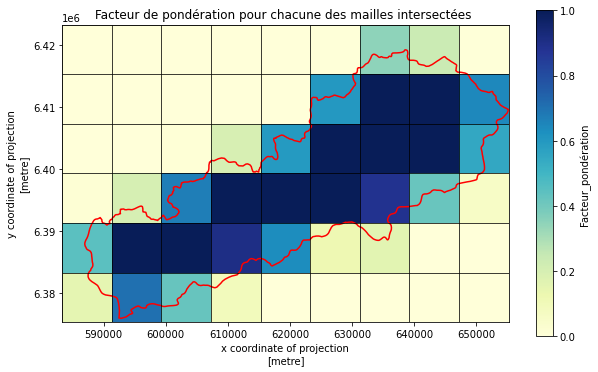

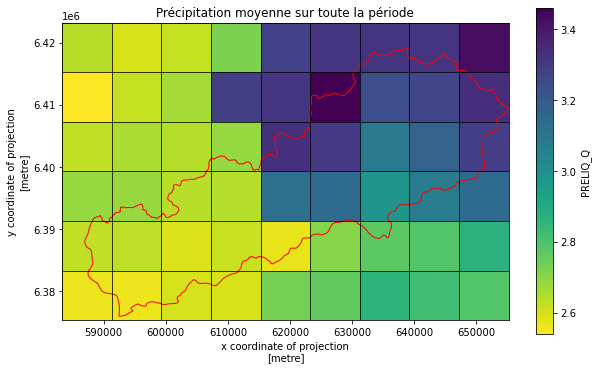

In [14]:
from shapely.geometry import box
# Surface maille
resolution_x = data.x[1] - data.x[0]
resolution_y = data.y[0] - data.y[1]
surface_maille = resolution_x * resolution_y

# Calcule de l'intersection entre le polygone et les mailles Safran
intersect_areas = np.zeros((data.sizes['x'], data.sizes['y']))
maille_geoms = []

for i in range(data.sizes['x']):
    for j in range(data.sizes['y']):    
        maille_geom = box(
            data.x[i] - resolution_x / 2, data.y[j] - resolution_y / 2,
            data.x[i] + resolution_x / 2, data.y[j] + resolution_y / 2
        )
        maille_geoms.append(maille_geom)

        intersection = gdf_polygon.intersection(maille_geom)

        if not intersection.is_empty.all():
            intersect_areas[i, j] = intersection.area.sum()

# Ajoute la variable 'surface_intersectee' au tableau "data" 
data['surface_intersectee'] = (('x', 'y'), intersect_areas)

# Calcule le facteur de pondération
facteur_pondération = data['surface_intersectee'] / surface_maille

# Ajoute la variable 'Facteur_pondération' au tableau "data"
data['Facteur_pondération'] = (('x', 'y'), facteur_pondération.data)

# Calcule les précipitations pondérées 
precipitation_weighted = data['PRELIQ_Q'] * facteur_pondération

# Ajoute la variable "Cumul_pondere" au tableau "data"
data['Cumul_pondere'] = (('time', 'y', 'x'), precipitation_weighted.data)

# Correction des axes pour l'affichage 
Facteur_pondération = data['Facteur_pondération'].transpose('y', 'x')

# Créer un GeoDataFrame pour les mailles
gdf_mailles = gpd.GeoDataFrame(geometry=maille_geoms)
gdf_mailles.crs = "EPSG:2154"

# Facteur de pondération
fig, ax = plt.subplots(figsize=(10, 6))
Facteur_pondération.plot(ax=ax, cmap='YlGnBu')

# Superposition du polygone BV et des mailles
gdf_polygon.boundary.plot(ax=ax, color='red')
gdf_mailles.boundary.plot(ax=ax, color='black', linewidth=0.5)

plt.title("Facteur de pondération pour chacune des mailles intersectées ")

# Précipitation moyenne sur toute la période 
fig, ax = plt.subplots(figsize=(10, 6))
data.PRELIQ_Q.mean('time').plot(ax=ax,cmap='viridis_r')

# Superposition du polygone BV et des mailles 
gdf_polygon.plot(ax=ax, color='none', edgecolor='red')
gdf_mailles.boundary.plot(ax=ax, color='black', linewidth=0.5)

plt.title("Précipitation moyenne sur toute la période")

plt.show()


###  6. Représentation des résultats sous forme de graphe

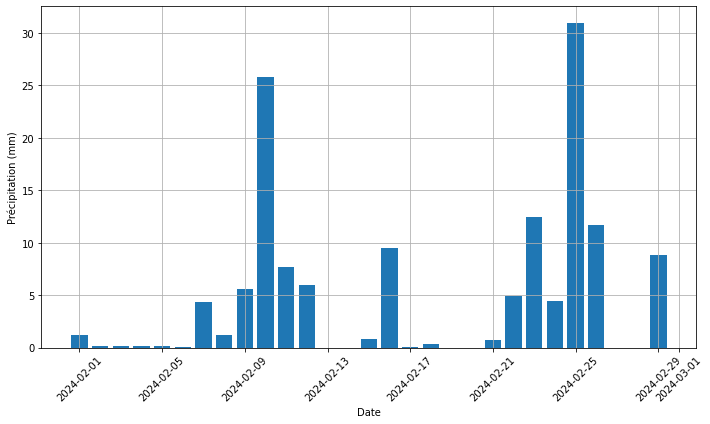

Cumul total: 137.12 mm


In [36]:
# Sélection de la periode 
data = data.sel(time=slice("2024-02-01", "2024-02-29"))

# Calcule les précipitations cumulées pour chaque maille au pas de temps journalier 
total_precipitations = data['Cumul_pondere'].sum(dim=('x', 'y'))/Facteur_pondération.sum()
dates = data.time.values
plt.figure(figsize=(10, 6))
plt.bar(dates, total_precipitations)

plt.xlabel("Date")
plt.ylabel("Précipitation (mm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcul du cumul total sur la période
cumul = total_precipitations.sum()
print(f"Cumul total: {cumul:.2f} mm")


#### 7. Export des données dans un tableau .csv

In [35]:
df = pd.DataFrame({'Date': dates, 'Precipitations (mm)': total_precipitations})
output_file = 'BV_Célé_02_24_Safran.csv'
df.to_csv(output_file, index=False)